In [0]:
from google.colab import files
files.upload()

In [0]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle competitions download -c quora-insincere-questions-classification

 75% 41.0M/54.4M [00:00<00:00, 80.8MB/s]
100% 54.4M/54.4M [00:00<00:00, 122MB/s] 
100% 5.95G/5.96G [02:51<00:00, 31.5MB/s]
100% 5.96G/5.96G [02:51<00:00, 37.2MB/s]
  0% 0.00/4.08M [00:00<?, ?B/s]
100% 4.08M/4.08M [00:00<00:00, 134MB/s]
 57% 9.00M/15.7M [00:00<00:00, 21.7MB/s]
100% 15.7M/15.7M [00:00<00:00, 35.0MB/s]


In [0]:
from zipfile import ZipFile
def extract_zip(file):
  with ZipFile(file,'r') as zip:
    zip.extractall()
    print("Done extracting", file)

In [0]:
import os
def remove_zip(file):
  os.remove(file)
  print("Successfully deletion of",file)

In [0]:
zips = ["train.csv.zip"]
for zip in zips:
  extract_zip(zip)
  remove_zip(zip)

Done extracting train.csv.zip
Successfully deletion of train.csv.zip


In [0]:
import pandas as pd
train = pd.read_csv("train.csv")

Text(0, 0.5, 'No of questions')

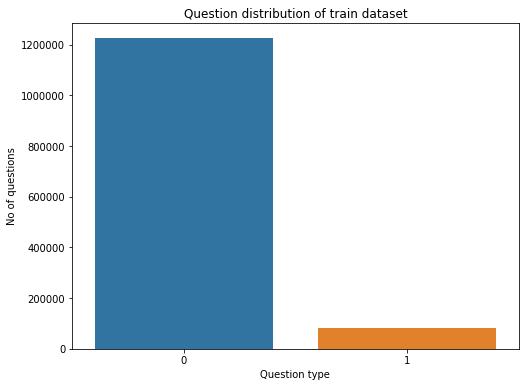

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
target_count = train["target"].value_counts()

plt.figure(figsize = (8, 6))
ax = sns.barplot(target_count.index, target_count.values)
ax.set_title("Question distribution of train dataset")
ax.set_xlabel("Question type")
ax.set_ylabel("No of questions")

In [0]:
train["quest_len"] = train["question_text"].apply(lambda x: len(x.split()))

In [0]:
sincere = train[train["target"] == 0]
insincere = train[train["target"] == 1]

Text(0.5, 1.0, 'Questions Length Distribution of both question')

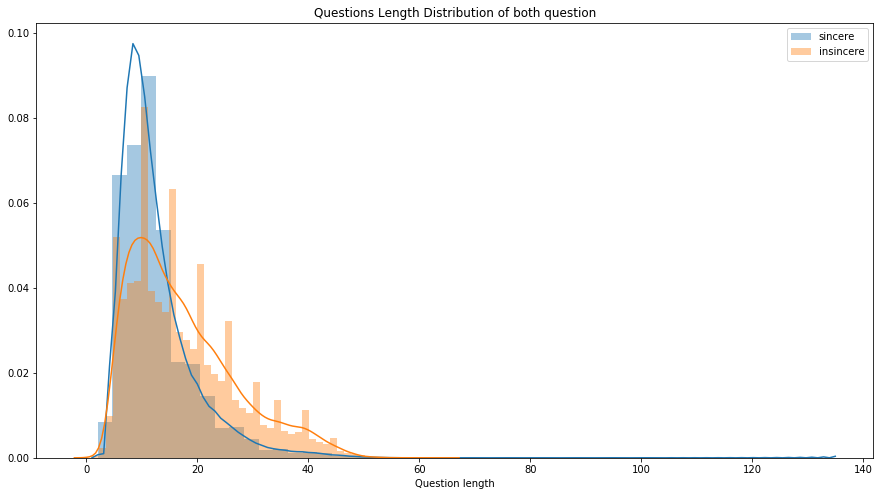

In [0]:

plt.figure(figsize = (15, 8))
sns.distplot(sincere["quest_len"], hist = True, label = "sincere")
sns.distplot(insincere["quest_len"], hist = True, label = "insincere")
plt.legend()
plt.xlabel("Question length")
plt.title("Questions Length Distribution of both question")

Text(0.5, 1.0, 'Questions Length Distribution of sincere question')

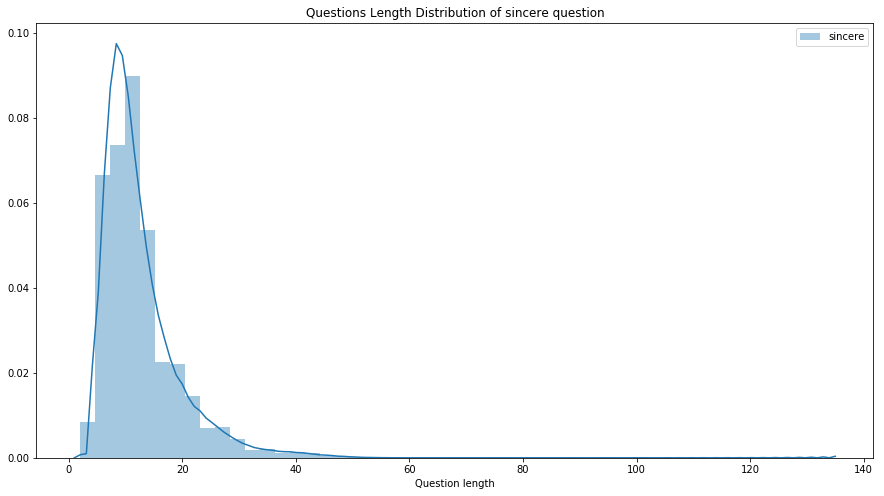

In [0]:
plt.figure(figsize = (15, 8))
sns.distplot(sincere["quest_len"], hist = True, label = "sincere")
plt.legend()
plt.xlabel("Question length")
plt.title("Questions Length Distribution of sincere question")

Text(0.5, 1.0, 'Questions Length Distribution of insincere question')

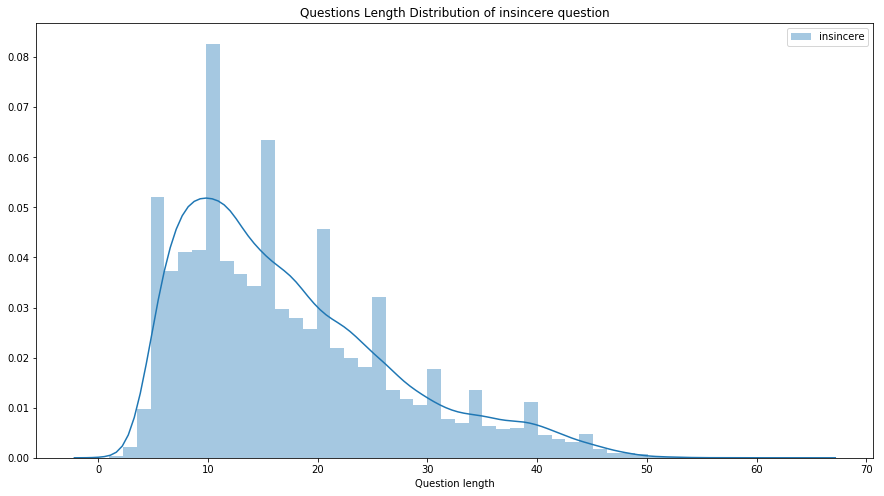

In [0]:
plt.figure(figsize = (15, 8))
sns.distplot(insincere["quest_len"], hist = True, label = "insincere")
plt.legend()
plt.xlabel("Question length")
plt.title("Questions Length Distribution of insincere question")

100%|██████████| 80810/80810 [59:57<00:00, 22.46it/s]


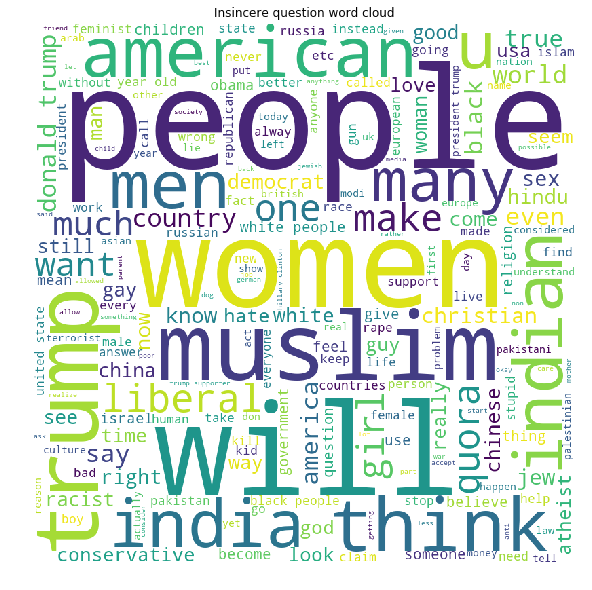

In [0]:
from wordcloud import WordCloud, STOPWORDS
from tqdm import tqdm

comment_words = ' '
stopwords = set(STOPWORDS)

insincere.reset_index(inplace=True)

for i in tqdm(range(len(insincere))):
  val = insincere.question_text[i]
  tokens = str(val).split() 
  
  for i in range(len(tokens)): 
      tokens[i] = tokens[i].lower()           
  
  for words in tokens: 
    comment_words = comment_words + words + ' '
  

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.title("Insincere question word cloud")
plt.tight_layout(pad = 0) 
  
plt.show() 